# **Домашнее задание**

Визуализируйте корреляцию между числовыми признаками, использованными для обучения модели и залогируйте изображение в Comet.

В качестве ответа приложите обновленный ноутбук.

*Форма оценки ментором:*

1) Проведена визуализация корреляции между 7 числовыми признаками, использованными для обучения модели - 5 баллов

2) Произведено логирование графика в CometMl - 10 баллов



# Импорт библиотек

In [2]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

# Настройка CometML
<img src='https://camo.githubusercontent.com/b35adf34bc440ea2ac19bb0d3432f48e26d71ab8e4c256e936b709eec44f5b19/68747470733a2f2f7777772e636f6d65742e6d6c2f696d616765732f6c6f676f5f636f6d65745f6c696768742e706e67' width=500px>

In [3]:
#!pip install comet_ml

In [4]:
from comet_ml import Experiment

In [5]:
# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key="5vZWA3irmzydGpLocyL2ZTJEq",
    project_name="general",
    workspace="terr-14",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/terr-14/general/6b69e97ac7484564b63749adba8fff96



# Загрузка данных

In [6]:
df = pd.read_csv('./data/KaggleV2-May-2016.csv')

In [7]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Визуализация

### Распределение числовых признаков

{'web': 'https://www.comet.ml/api/image/download?imageId=904434b02dd04d7ea87ffd6137f72fa4&experimentKey=6b69e97ac7484564b63749adba8fff96',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=904434b02dd04d7ea87ffd6137f72fa4&experimentKey=6b69e97ac7484564b63749adba8fff96',
 'imageId': '904434b02dd04d7ea87ffd6137f72fa4'}

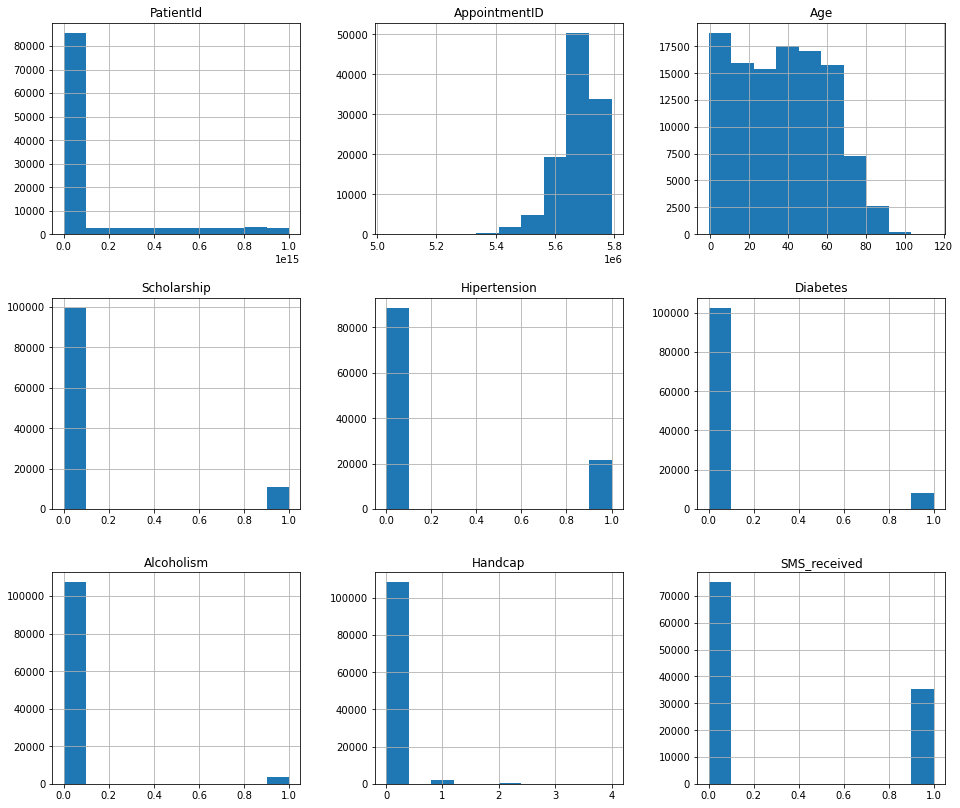

In [8]:
df.hist(figsize=(16,14));
#логируем гистограмму
experiment.log_figure(figure=plt)

*Проанализируем число людей каждого возраста*

In [9]:
print("Уникальные значения в `Age` => {}".format(df.Age.unique()))

Уникальные значения в `Age` => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [10]:
# Удалим аномальные значения
df = df[(df.Age >= 0) & (df.Age <= 110)]
df.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

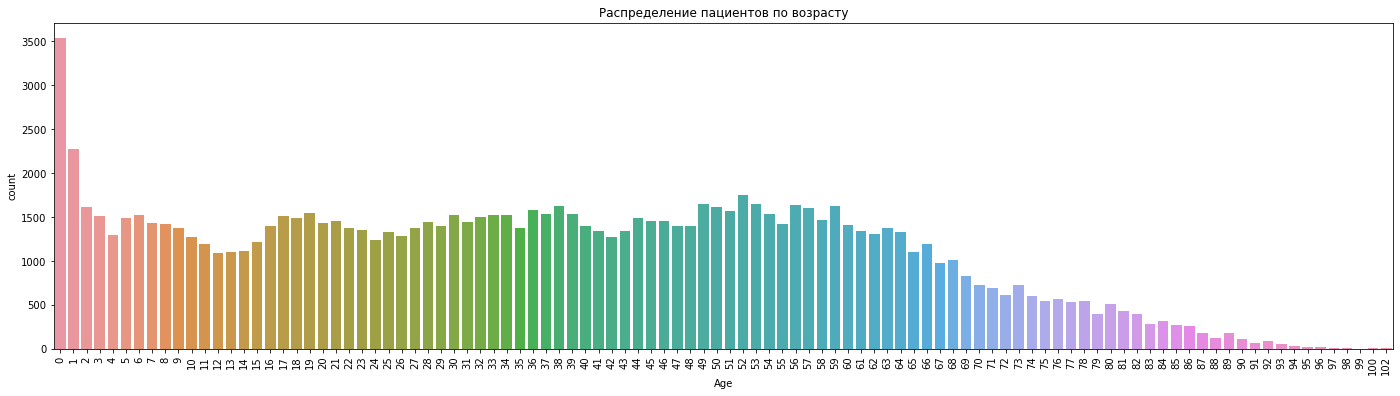

In [11]:
plt.figure(figsize=(24,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("Распределение пациентов по возрасту")
experiment.log_figure(figure=plt)
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hipertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handcap         110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No-show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


## Выделение числовых признаков

In [13]:
df_num = df.drop(['Gender', 'Neighbourhood','AppointmentID', 'PatientId', 'ScheduledDay', 'AppointmentDay', 'No-show'], axis=1)

In [14]:
display(df_num)


,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,62,0,1,0,0,0,0
1,56,0,0,0,0,0,0
2,62,0,0,0,0,0,0
3,8,0,0,0,0,0,0
4,56,0,1,1,0,0,0
...,...,...,...,...,...,...,...
110522,56,0,0,0,0,0,1
110523,51,0,0,0,0,0,1
110524,21,0,0,0,0,0,1
110525,38,0,0,0,0,0,1


## Матрица корреляции

In [15]:
heatmap_data = df_num.corr()
heatmap_data

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,1.000000,-0.092437,0.504726,0.292509,0.095862,0.077369,0.012676
Scholarship,-0.092437,1.000000,-0.019731,-0.024899,0.035019,-0.008520,0.001188
Hipertension,0.504726,-0.019731,1.000000,0.433096,0.087972,0.080249,-0.006309
Diabetes,0.292509,-0.024899,0.433096,1.000000,0.018471,0.057629,-0.014555
Alcoholism,0.095862,0.035019,0.087972,0.018471,1.000000,0.004689,-0.026151
Handcap,0.077369,-0.008520,0.080249,0.057629,0.004689,1.000000,-0.024026
SMS_received,0.012676,0.001188,-0.006309,-0.014555,-0.026151,-0.024026,1.000000


In [16]:
heatmap_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Age to SMS_received
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           7 non-null      float64
 1   Scholarship   7 non-null      float64
 2   Hipertension  7 non-null      float64
 3   Diabetes      7 non-null      float64
 4   Alcoholism    7 non-null      float64
 5   Handcap       7 non-null      float64
 6   SMS_received  7 non-null      float64
dtypes: float64(7)
memory usage: 748.0+ bytes


## Тепловая карта

{'web': 'https://www.comet.ml/api/image/download?imageId=7b505180837d4e5f8834b007ad64d9b6&experimentKey=6b69e97ac7484564b63749adba8fff96',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=7b505180837d4e5f8834b007ad64d9b6&experimentKey=6b69e97ac7484564b63749adba8fff96',
 'imageId': '7b505180837d4e5f8834b007ad64d9b6'}

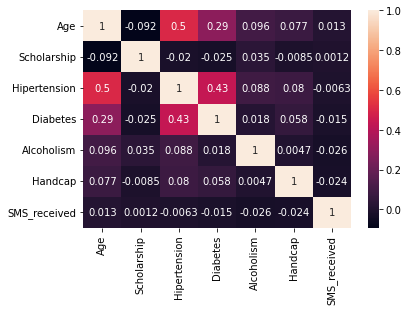

In [17]:
sns.heatmap(heatmap_data, annot=True)
experiment.log_figure(figure=plt)

## Результаты

In [21]:
experiment.display()

In [22]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/terr-14/general/6b69e97ac7484564b63749adba8fff96
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 3
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (13.95 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting..